<a href="https://colab.research.google.com/github/francji1/01RAD/blob/main/python/01RAD_ex3_python_student_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read and setup dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data from the URL
url_fsdata = 'https://raw.githubusercontent.com/francji1/01RAD/main/data/fsdata.csv'
fsdata = pd.read_csv(url_fsdata, sep=',')

### Explore the dataset

In [ ]:
first_rows = fsdata.head()
data_types = fsdata.dtypes
summary = fsdata.describe()
dimension = fsdata.shape
na_occurrence = fsdata.isna().sum()
first_rows, data_types, summary, dimension, na_occurrence

(   Unnamed: 0    father       son
 0           1  65.04851  59.77827
 1           2  63.25094  63.21404
 2           3  64.95532  63.34242
 3           4  65.75250  62.79238
 4           5  61.13723  64.28113,
 Unnamed: 0      int64
 father        float64
 son           float64
 dtype: object,
         Unnamed: 0       father          son
 count  1078.000000  1078.000000  1078.000000
 mean    539.500000    67.687097    68.684070
 std     311.336099     2.744868     2.814702
 min       1.000000    59.008000    58.507080
 25%     270.250000    65.787735    66.931232
 50%     539.500000    67.766600    68.615820
 75%     808.750000    69.602980    70.465970
 max    1078.000000    75.433930    78.364790,
 (1078, 3),
 Unnamed: 0    0
 father        0
 son           0
 dtype: int64)

In [ ]:
fsdata

,Unnamed: 0,father,son
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113
...,...,...,...
1073,1074,66.99681,70.75232
1074,1075,71.33181,68.26774
1075,1076,71.78314,69.30589
1076,1077,70.73837,69.30199


## 2. Data visualization

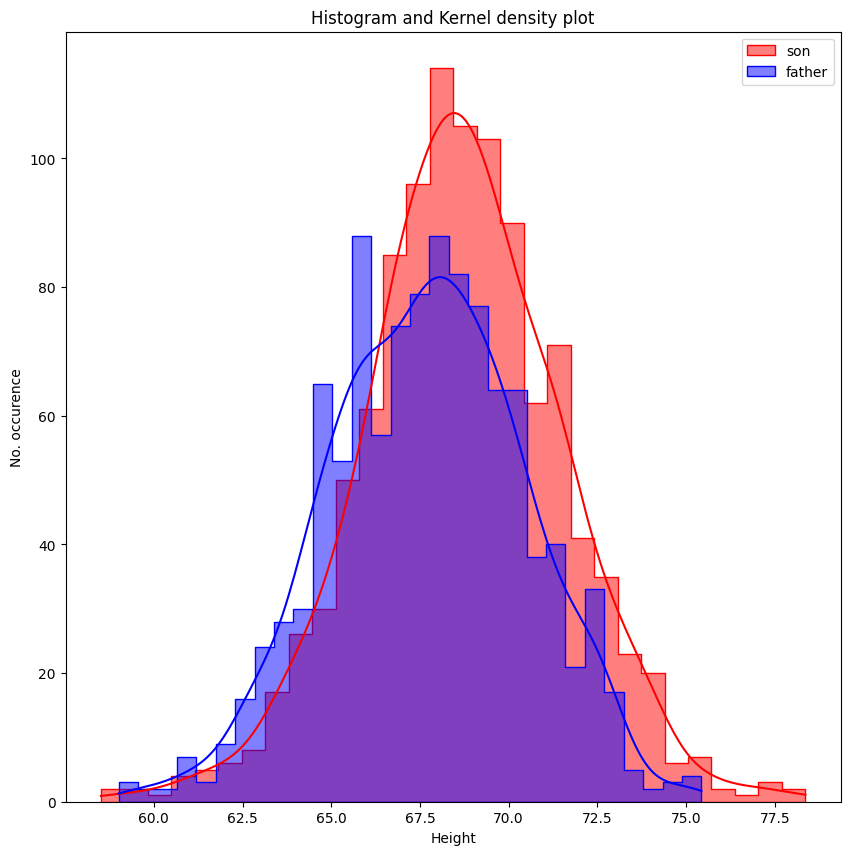

In [ ]:



# Setting color palette
color_6 = sns.color_palette("hsv", 6)
color_1 = sns.color_palette("hsv", 1)

# Plotting the combined histogram for both 'son' and 'father'
plt.figure(figsize=(10, 10))
sns.histplot(fsdata, x="son", kde=1, color="red", label="son", bins=30, element='step')
sns.histplot(fsdata, x="father", kde=True, color="blue", label="father", bins=30, element='step')
plt.title("Histogram and Kernel density plot")
plt.xlabel("Height")
plt.ylabel("No. occurence")
plt.legend()
plt.show()


### Reshape and further visualization

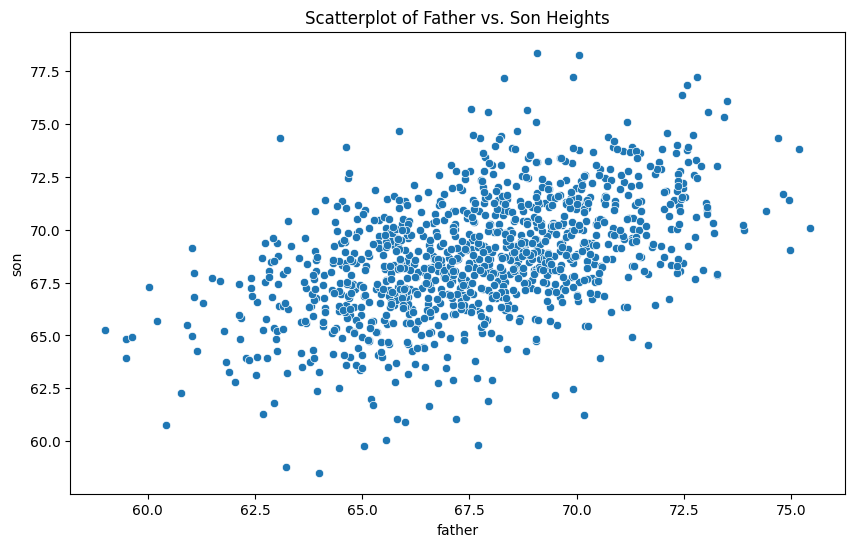

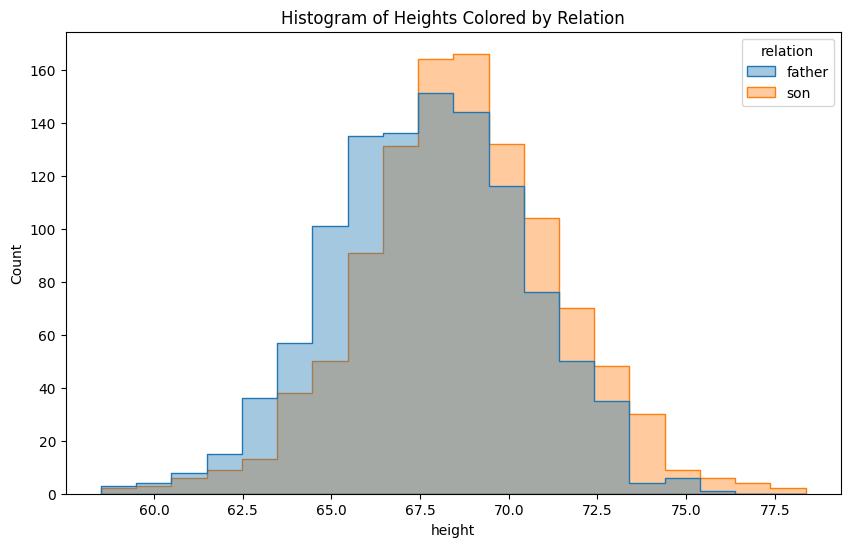

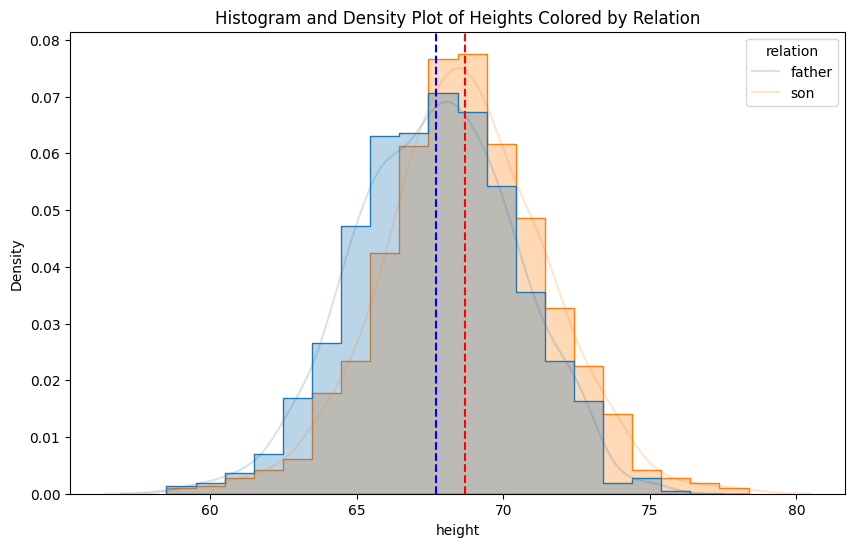

In [ ]:

# Reshaping the dataset to longer format
fsdata_long = fsdata.reset_index().melt(id_vars=['index'], value_vars=['father', 'son'],
                                        var_name='relation', value_name='height')
fsdata_long = fsdata_long.rename(columns={'index': 'family'})

# Scatterplot of father vs. son
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son')
plt.title("Scatterplot of Father vs. Son Heights")
plt.show()

# Histogram of heights colored by relation
plt.figure(figsize=(10, 6))
sns.histplot(fsdata_long, x='height', hue='relation', bins=20, element='step', alpha=0.4)
plt.title("Histogram of Heights Colored by Relation")
plt.show()

# Histogram of heights with density plots colored by relation
plt.figure(figsize=(10, 6))
sns.histplot(fsdata_long, x='height', hue='relation', bins=20, element='step', alpha=0.3, stat="density")
sns.kdeplot(data=fsdata_long, x='height', hue='relation', alpha=0.2)
plt.axvline(x=fsdata_long[fsdata_long['relation'] == 'father']['height'].mean(), color='blue', linestyle='--')
plt.axvline(x=fsdata_long[fsdata_long['relation'] == 'son']['height'].mean(), color='red', linestyle='--')
plt.title("Histogram and Density Plot of Heights Colored by Relation")
plt.show()


The sns.histplot function from the Seaborn library, when using the kde=True argument, estimates the Kernel Density Estimation (KDE) of the data. By default, Seaborn uses the Gaussian (also known as the "normal") kernel for KDE.

### Hypothesis testing: F-test

In [ ]:

from scipy.stats import f

# Calculating F test statistics
f_stat = fsdata['father'].var() / fsdata['son'].var()
df1 = len(fsdata['father']) - 1
df2 = len(fsdata['son']) - 1
p_val = f.cdf(f_stat, df1, df2)
two_sided_p_val = 2 * min(p_val, 1-p_val)

f_stat, two_sided_p_val


(0.9509952357703666, 0.4097989207603206)

In [ ]:
300000/60/60


83.33333333333333

### Hypothesis testing: t-tests

In [ ]:

from scipy.stats import ttest_ind, ttest_rel

# Unpaired t-test (assuming equal variance)
t_stat_unpaired, p_val_unpaired = ttest_ind(fsdata['father'], fsdata['son'], equal_var=True)

# Paired t-test
t_stat_paired, p_val_paired = ttest_rel(fsdata['father'], fsdata['son'])

# One-sided t-test: Are sons taller than fathers?
t_stat_onesided, p_val_onesided = ttest_rel(fsdata['father'], fsdata['son'])
# Since we want to check if sons are taller, we need to divide the p-value by 2
p_val_onesided = p_val_onesided / 2 if t_stat_onesided < 0 else 1 - p_val_onesided / 2


In [ ]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Test Type': ['Unpaired T-test', 'Paired T-test', 'One-sided T-test (Sons > Fathers)'],
    'T-statistic': [t_stat_unpaired, t_stat_paired, t_stat_onesided],
    'P-value': [p_val_unpaired, p_val_paired, p_val_onesided]
})
# Print the formatted table
print(results)

                           Test Type  T-statistic       P-value
0                    Unpaired T-test    -8.325920  1.467508e-16
1                      Paired T-test   -11.788549  2.957226e-30
2  One-sided T-test (Sons > Fathers)   -11.788549  1.478613e-30


### Scatter plots and regression lines

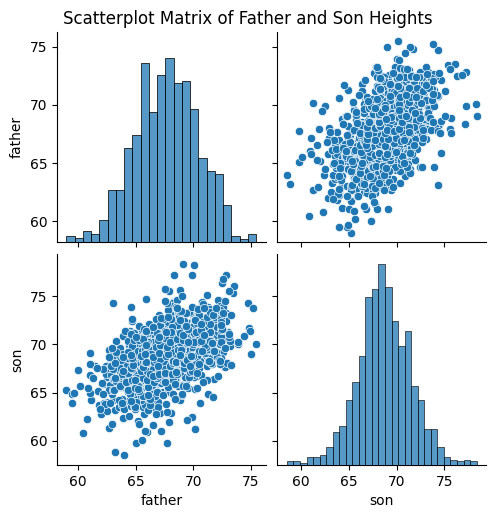

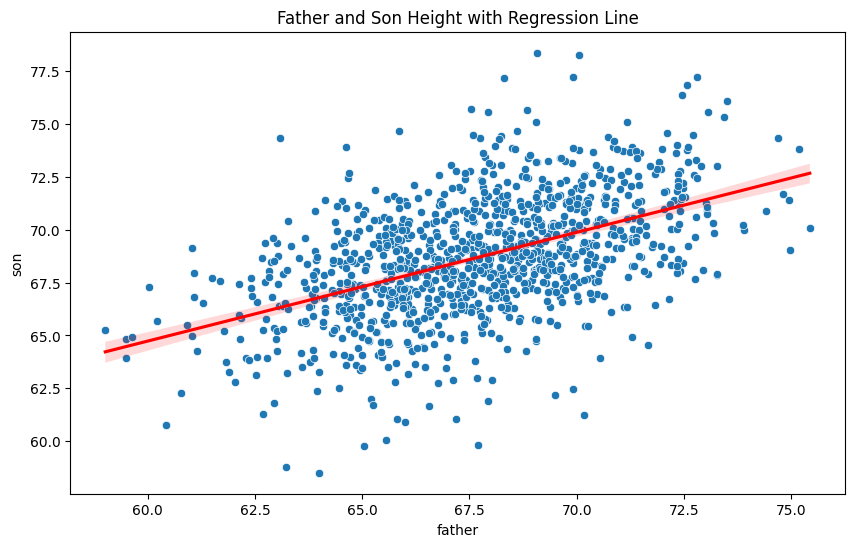

In [ ]:

# Scatter plot matrix
sns.pairplot(fsdata[['father', 'son']])
plt.suptitle("Scatterplot Matrix of Father and Son Heights", y=1.02)
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son')
sns.regplot(data=fsdata, x='father', y='son', scatter=False, color='red')
plt.title("Father and Son Height with Regression Line")
plt.show()


### Kernel used in sns.histplot

The `sns.histplot` function from the Seaborn library, when using the `kde=True` argument, estimates the Kernel Density Estimation (KDE) of the data. By default, Seaborn uses the Gaussian (also known as the "normal") kernel for KDE. Thus, the plot you mentioned utilizes the Gaussian kernel for estimating the density.

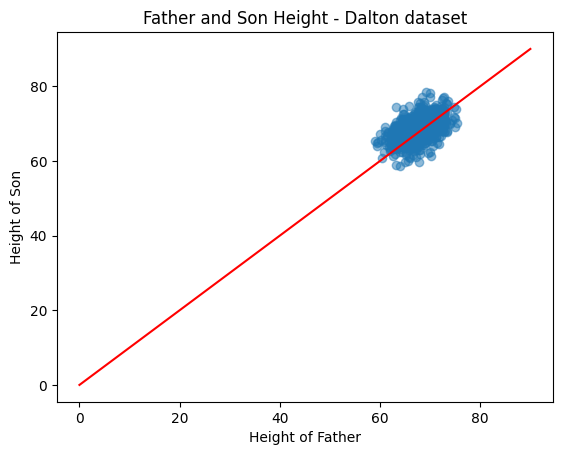

In [ ]:
# Scatter plot of son vs. father heights
plt.scatter(fsdata['father'], fsdata['son'], alpha=0.5)
plt.title("Father and Son Height - Dalton dataset")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.plot([0, 90], [0, 90], color='red')  # Line with slope 1 and intercept 0
plt.show()


### 2. Analyzing the data 'manually'

In [ ]:

# Mean and standard deviation calculations
s_mean = fsdata['son'].mean()
f_mean = fsdata['father'].mean()
s_sd = fsdata['son'].std()
f_sd = fsdata['father'].std()

# Correlation calculation
fs_cor = fsdata['son'].corr(fsdata['father'])

# Slope of the regression line
b1_hat = (fs_cor * s_sd) / f_sd
b1_hat_alt = fsdata.cov().loc['father', 'son'] / f_sd**2

# Intercept of the regression line
b0_hat = s_mean - b1_hat * f_mean


### 3. Computing residuals and other statistics

In [ ]:
n = len(fsdata)
X = fsdata['father'].values
Y = fsdata['son'].values
IX = np.column_stack([np.ones(n), X])

# Compute residuals
res = Y - np.dot(IX, np.array([b0_hat, b1_hat]))
res

array([-7.54932052, -3.18943229, -3.93726219, ..., -1.48392692,
       -0.95071793, -3.0154758 ])

In [ ]:
# Estimate variance of disturbances
p = 1
sigma = np.sqrt(sum(res**2) / (n - 1 - p))

# Variance of parameters
S_xx = sum((X - f_mean)**2)
var_b1_hat = sigma**2 / S_xx
sd_b1_hat = np.sqrt(var_b1_hat)

var_b0_hat = sigma**2 * (sum(X**2) / (n * S_xx))
sd_b0_hat = np.sqrt(var_b0_hat)


### 4. OLS estimation

For this, we can use the `numpy.linalg` module to solve the matrix equations:

In [ ]:
from numpy.linalg import solve

# Reshape X to make it a 2D array
X_2D = X.reshape(-1, 1)

# Without intercept
beta_hat_wo = solve(X_2D.T @ X_2D, X_2D.T @ Y)

# With intercept
beta_hat_w = solve(IX.T @ IX, IX.T @ Y)

### 5. Coefficient of determination (R-squared)

In [ ]:
SS_tot = sum((Y - Y.mean())**2)
SS_reg = sum((np.dot(IX, np.array([b0_hat, b1_hat])) - s_mean)**2)
SS_res = sum(res**2)
R2 = 1 - SS_res/SS_tot
R2

0.2513401022491367

In [ ]:
# Calculate total, regression, and residual sums of squares
SS_tot = np.sum((Y - Y.mean())**2)
SS_reg = np.sum((np.dot(IX, beta_hat_w) - Y.mean())**2)
SS_res = np.sum(res**2)

# Check if SS_tot equals SS_reg + SS_res
print(SS_tot == (SS_reg + SS_res))

# Calculate R-squared using different formulas
R2_1 = 1 - SS_res/SS_tot
R2_2 = SS_reg/SS_tot
R2_3 = (SS_tot - SS_res)/SS_tot
print(R2_1, R2_2, R2_3)

False
0.25134010224913705 0.2513401022498157 0.25134010224913705


## Model without and with intercept using Python's statsmodels


In [ ]:
import statsmodels.api as sm

# Defining the variables
Y = fsdata['son'].values
X_wo_intercept = fsdata['father'].values.reshape(-1, 1)
X_with_intercept = sm.add_constant(fsdata['father'].values)


# Model without intercept
X_wo_intercept = fsdata['father'].values.reshape(-1, 1)
model0 = sm.OLS(Y, X_wo_intercept).fit()
print(model0.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.506e+05
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:43:12   Log-Likelihood:                         -2637.4
No. Observations:                1078   AIC:                                      5277.
Df Residuals:                    1077   BIC:                                      5282.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:

# Model with intercept
X_with_intercept = sm.add_constant(fsdata['father'].values)
model1 = sm.OLS(Y, X_with_intercept).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.12e-69
Time:                        16:43:14   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8866      1.832     18.493      0.0

In [ ]:
# Extracting the coefficients from the models
beta_wo = model0.params[0]  # For the model without intercept
beta_w0, beta_w1 = model1.params  # For the model with intercept

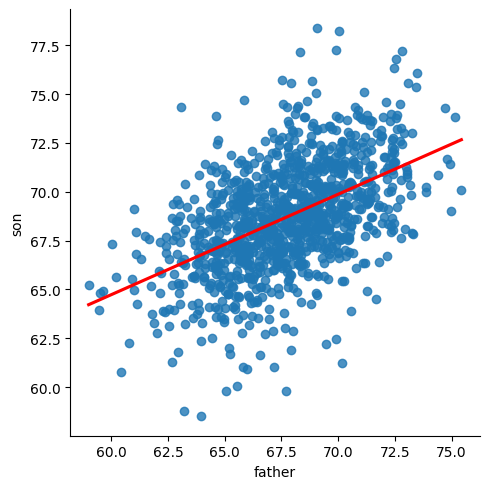

In [ ]:
import seaborn as sns

# Plot with regression line
sns.lmplot(data=fsdata, x='father', y='son', ci=None, line_kws={'color': 'red'})


<ipython-input-25-de1de4c9b75a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fsdata_outliers = fsdata_outliers.append({'father': 70, 'son': 10}, ignore_index=True)
<ipython-input-25-de1de4c9b75a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fsdata_outliers = fsdata_outliers.append({'father': 80, 'son': 20}, ignore_index=True)


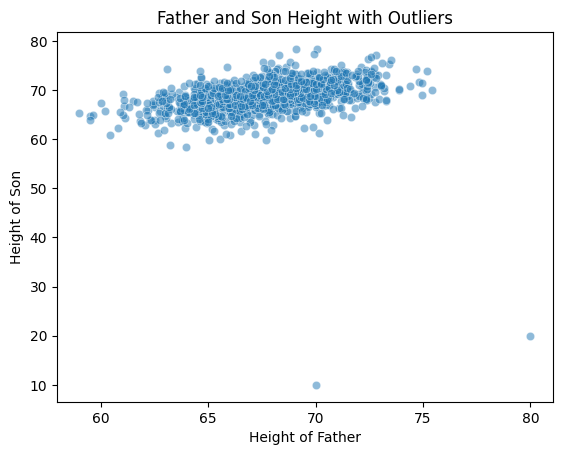

In [ ]:
# Regenerating the dataset with outliers
fsdata_outliers = fsdata.copy()
fsdata_outliers = fsdata_outliers.append({'father': 70, 'son': 10}, ignore_index=True)
fsdata_outliers = fsdata_outliers.append({'father': 80, 'son': 20}, ignore_index=True)

# Displaying the scatter plot with outliers for only "father" and "son" columns
sns.scatterplot(data=fsdata_outliers, x='father', y='son', alpha=0.5)
plt.title("Father and Son Height with Outliers")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.show()


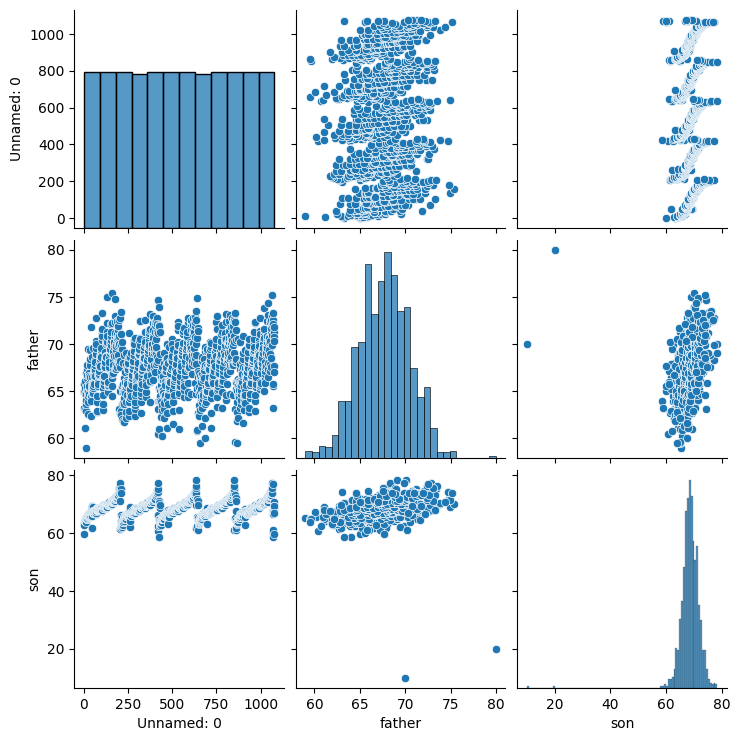

In [ ]:
# Displaying the scatter plot with outliers
sns.pairplot(fsdata_outliers)

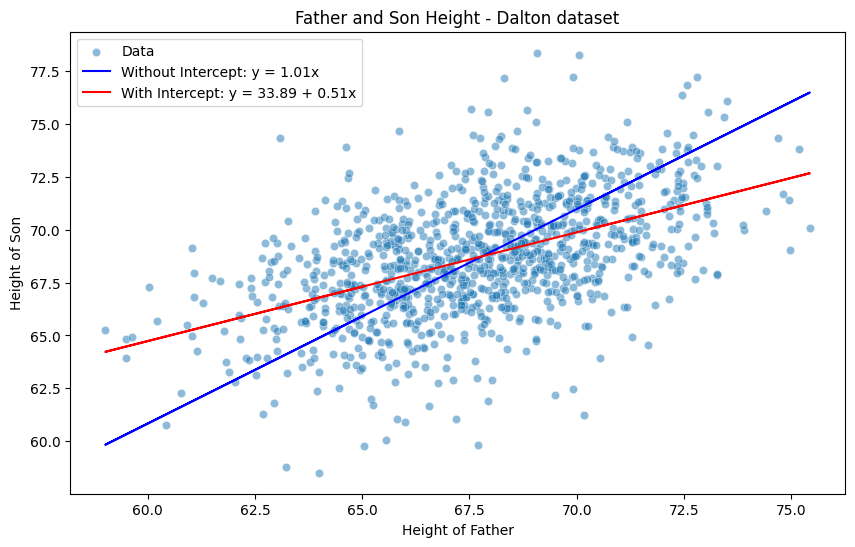

In [ ]:
# Plotting the data points along with the regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son', label='Data', alpha=0.5)
plt.plot(fsdata['father'], fsdata['father'] * beta_wo, color='blue',
         label=f'Without Intercept: y = {beta_wo:.2f}x')
plt.plot(fsdata['father'], beta_w0 + fsdata['father'] * beta_w1, color='red',
         label=f'With Intercept: y = {beta_w0:.2f} + {beta_w1:.2f}x')
plt.title("Father and Son Height - Dalton dataset")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.legend()
plt.show()


Coefficients:
 [33.88660435  0.51409304]

Residuals:
 [-7.54932052 -3.18943229 -3.93726219 ... -1.48392692 -0.95071793
 -3.0154758 ]

Fitted Values:
 [67.32759052 66.40347229 67.27968219 ... 70.78981692 70.25270793
 70.0304758 ]


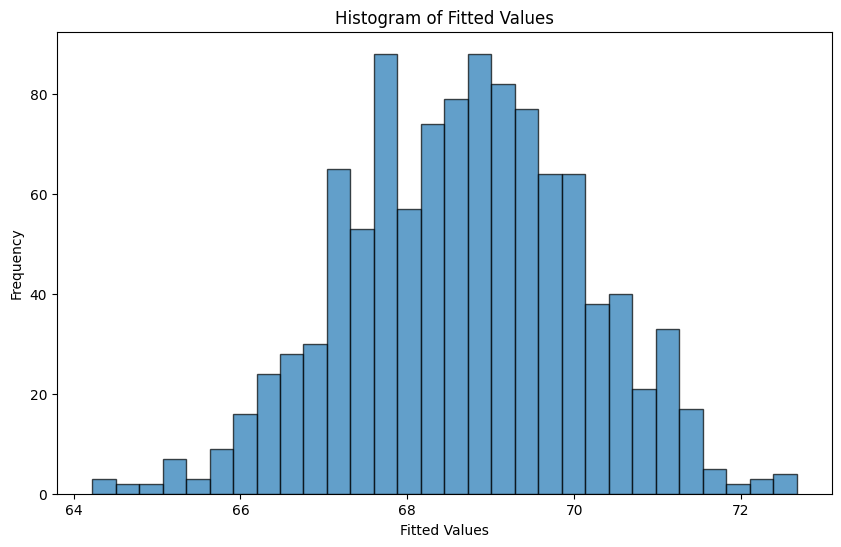


Sigma Hat (Standard Error of the Regression):
 2.436555791618702


In [ ]:
# Coefficients of the model
coefficients = model1.params
print("Coefficients:\n", coefficients)

# Residuals of the model
residuals = model1.resid
print("\nResiduals:\n", residuals)

# Fitted values (predictions based on the model)
fitted_values = model1.fittedvalues
print("\nFitted Values:\n", fitted_values)

# Histogram of the fitted values
plt.figure(figsize=(10, 6))
plt.hist(fitted_values, bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Frequency")
plt.show()

# For sigmaHat (standard error of the regression), in R it's typically derived from the residuals.
# In Python with statsmodels:
sigma_hat = np.sqrt(model1.scale)
print("\nSigma Hat (Standard Error of the Regression):\n", sigma_hat)


* Residuals vs Fitted values: To detect non-linearity, unequal error variances, and outliers.
* Normal Q-Q plot: To check the normality of the residuals.
* Scale-Location plot: To check the homogeneity of variance of the residuals.
* Residuals vs Leverage: To identify influential cases.

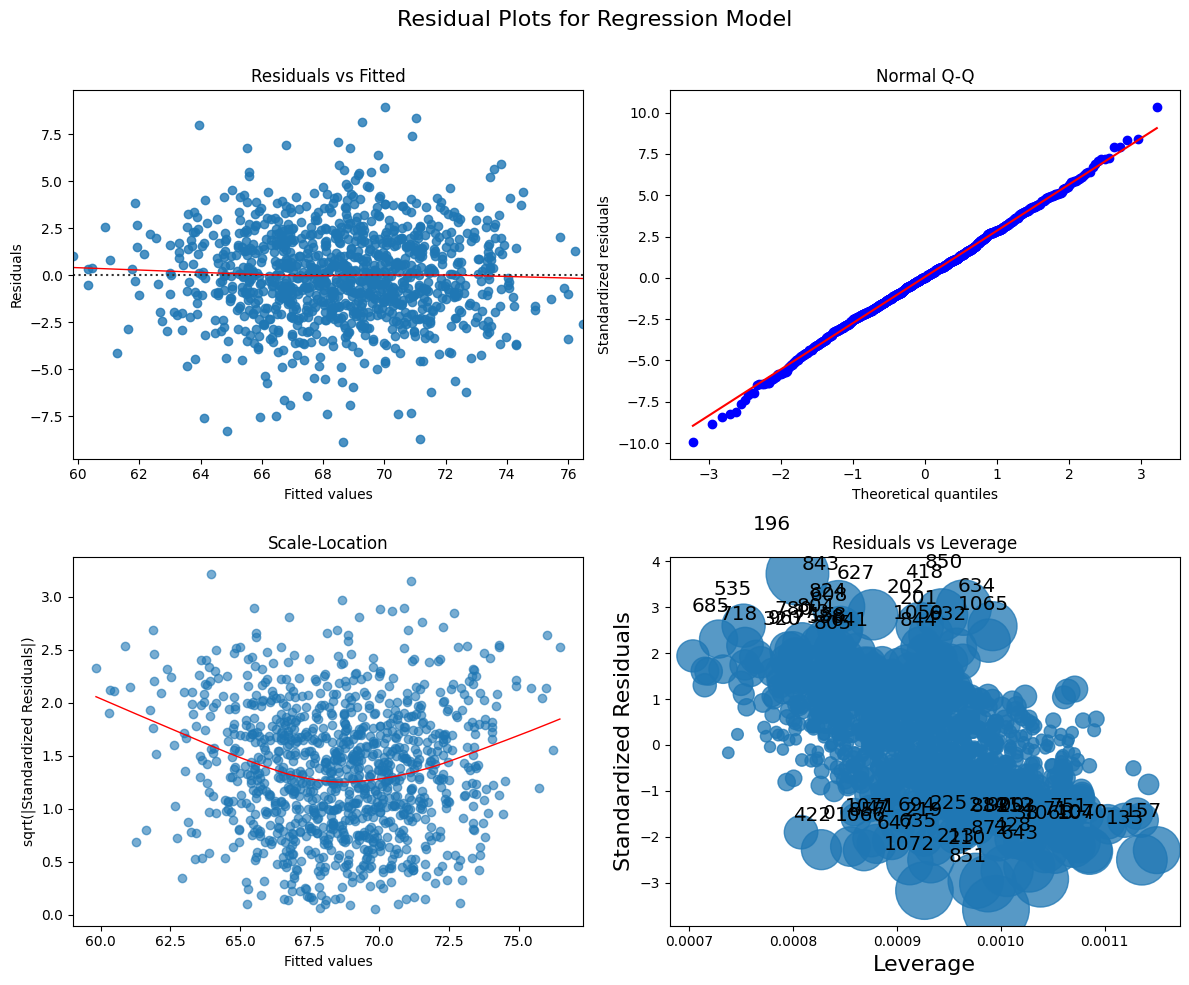

In [ ]:
import scipy.stats as stats
from statsmodels.graphics.regressionplots import influence_plot

# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Residual Plots for Regression Model', fontsize=16)

# 1. Residuals vs Fitted values
sns.residplot(x=model0.fittedvalues, y=model0.resid, lowess=True, ax=axs[0, 0], line_kws={'color': 'red', 'lw': 1})
axs[0, 0].set_title('Residuals vs Fitted')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Residuals')

# 2. Normal Q-Q plot
stats.probplot(model0.resid, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q')
axs[0, 1].set_ylabel('Standardized residuals')

# 3. Scale-Location plot
axs[1, 0].scatter(model0.fittedvalues, np.sqrt(np.abs(model0.resid)), alpha=0.6)
sns.regplot(x=model0.fittedvalues, y=np.sqrt(np.abs(model0.resid)), scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 0])
axs[1, 0].set_title('Scale-Location')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('sqrt(|Standardized Residuals|)')

# 4. Residuals vs Leverage
influence_plot(model0, ax=axs[1, 1], criterion="cooks")
axs[1, 1].set_title('Residuals vs Leverage')
axs[1, 1].set_xlabel('Leverage')
axs[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



# Exercise - Homework 02

## Investigate a relationship between speed and stopping distance for cars

### Questions:
 1) Display data set (scatter plot, histograms and density plots of speed and dist variables)

 2) Try model with and without intercept

 3) Compute "manually" OLS estimate of regression parameters and error variance

 4) Compute "manually" variance of estimated parameters

 5) Plot data with both estimated regression lines

 6) Investigate output from the lm function

 7) whats the estimated stopping distance for a car going 20mph? (use both models) compare with the estimated stopping distance for a car going 30mph? (use both models, can we predict this?)

 8) Is the simple linear model good approximation for these problems? Suggest next steps.



In [ ]:
# Loading the cars dataset from statsmodels
dataset_cars = sm.datasets.get_rdataset('cars', package='datasets')
cars_df = dataset_cars.data

# Displaying the first few rows of the dataset
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


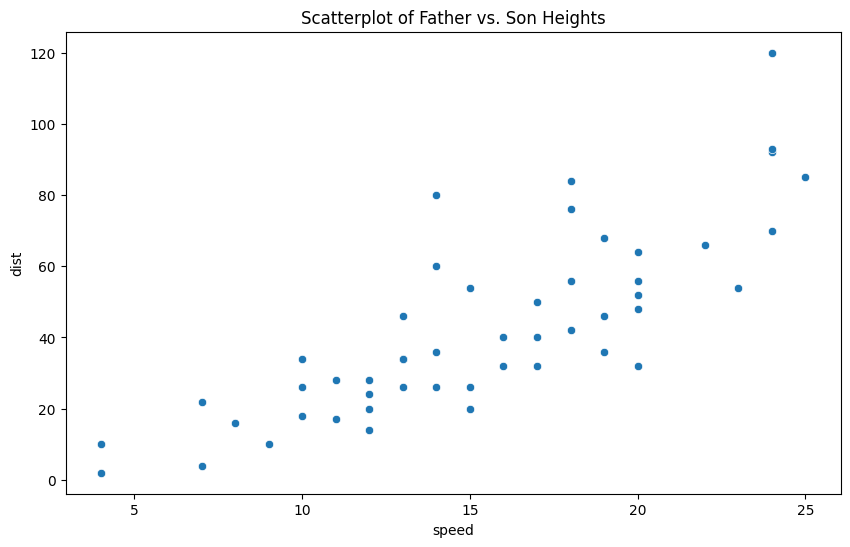

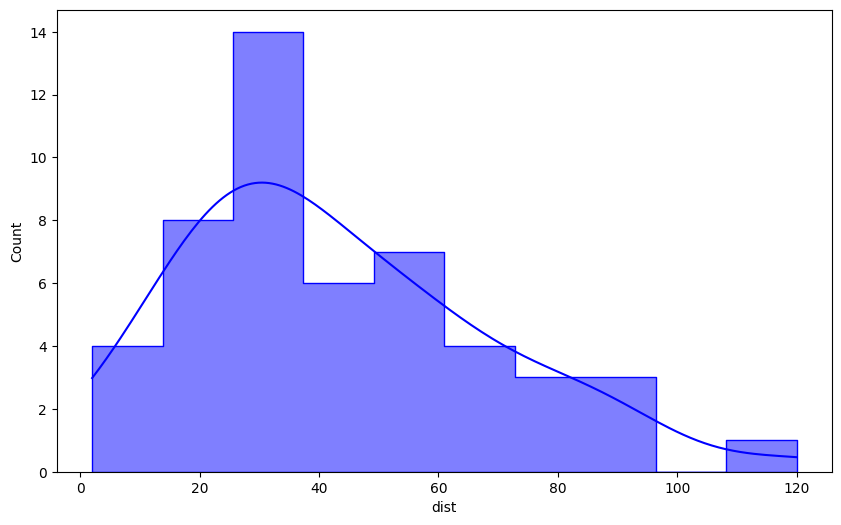

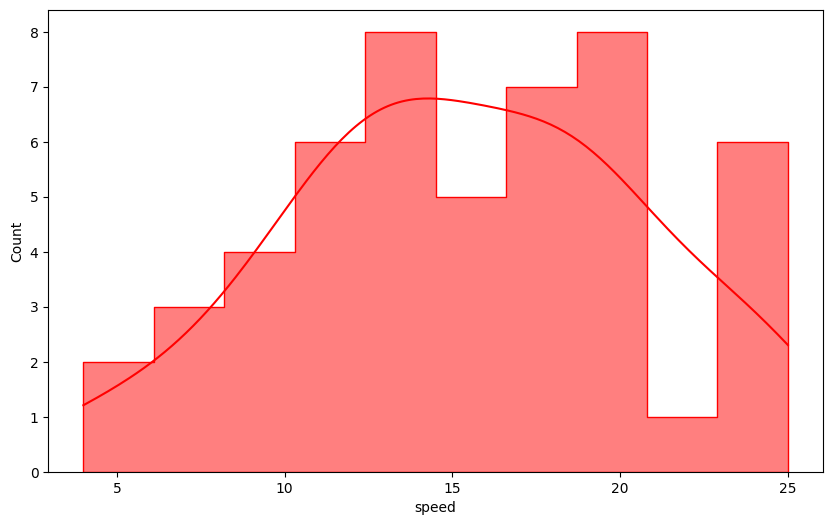

In [ ]:
# 1), zobrazení dat, scatter plot, histogram plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f
import statsmodels.api as sm
from numpy.linalg import solve
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_df, x='speed', y='dist')
plt.title("Scatterplot of Father vs. Son Heights")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(data=cars_df,x="dist",kde=1,bins=10,element="step",color="blue")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(data=cars_df,x="speed",kde=1,bins=10,element="step",color="red")
plt.show()
# Otázka, jak volit binování?

In [ ]:
# 2) Modely bez a s interceptem
Y = cars_df['dist'].values
X_wo_intercept = cars_df['speed'].values.reshape(-1, 1)
X_with_intercept = sm.add_constant(cars_df['speed'].values)


# Model without intercept
X_wo_intercept = cars_df['speed'].values.reshape(-1, 1)
model0 = sm.OLS(Y, X_wo_intercept).fit()
print(model0.summary())

# Model with intercept
X_with_intercept = sm.add_constant(cars_df['speed'].values)
model1 = sm.OLS(Y, X_with_intercept).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                    9.23e-26
Time:                        17:53:48   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Manuální verze 3) a 4) výpočet OLS a variance reziduí
s_mean=cars_df["speed"].mean()
d_mean=cars_df['dist'].mean()
s_sd=cars_df["speed"].std()
d_sd=cars_df['dist'].std()

speed_dist_corr=cars_df["speed"].corr(cars_df["dist"])

#slope
b1_hat_manual=(speed_dist_corr*d_sd)/s_sd

#intercept
b0_hat_manual=d_mean-b1_hat_manual*s_mean

n=len(cars_df)
X=cars_df['speed'].values
Y=cars_df["dist"].values
IX=np.column_stack([np.ones(n),X])
res=Y-np.dot(IX,np.array([b0_hat_manual,b1_hat_manual]))

p=1
sigma=np.sqrt(sum(res**2)/(n-1-p))# sedí s tím níže


[b1_hat_manual,b0_hat_manual,sigma,sigma**2]

[3.9324087591240873, -17.57909489051095, 15.379586748819907, 236.5316885644769]

In [ ]:
# 3) a 4) výpočet OLS a var reziduí


X_2D=X.reshape(-1,1)

beta_hat_wo = solve(X_2D.T @ X_2D, X_2D.T @ Y)
beta_hat_w = solve(IX.T @ IX, IX.T@Y)
#Rezidua bez interceptu
residuals_w = Y - IX @ beta_hat_w
#rezidua s interceptem
residuals_wo = Y - X_2D @ beta_hat_wo

sigma2_w = residuals_w.T @ residuals_w / (n - 2)
sigma2_wo = residuals_wo.T @ residuals_wo / (n - 1)

[beta_hat_w, beta_hat_wo,sigma2_w,sigma2_wo]



[array([-17.57909489,   3.93240876]),
 array([2.90913214]),
 236.5316885644769,
 264.36279259208976]

In [ ]:
S_xx=sum((X-s_mean)**2)
var_b1_hat=sigma**2/S_xx
var_b0_hat=sigma**2*(sum(X**2)/(n*S_xx))
[var_b0_hat,var_b1_hat]

[45.676513523078846, 0.17265086756531164]

In [ ]:
var_beta_hat_w = sigma2_w * np.linalg.inv(IX.T @ IX)
var_beta_hat_wo = sigma2_wo * np.linalg.inv(X_2D.T @ X_2D)

[var_beta_hat_w, var_beta_hat_wo]

[array([[45.67651352, -2.65882336],
        [-2.65882336,  0.17265087]]),
 array([[0.01998509]])]

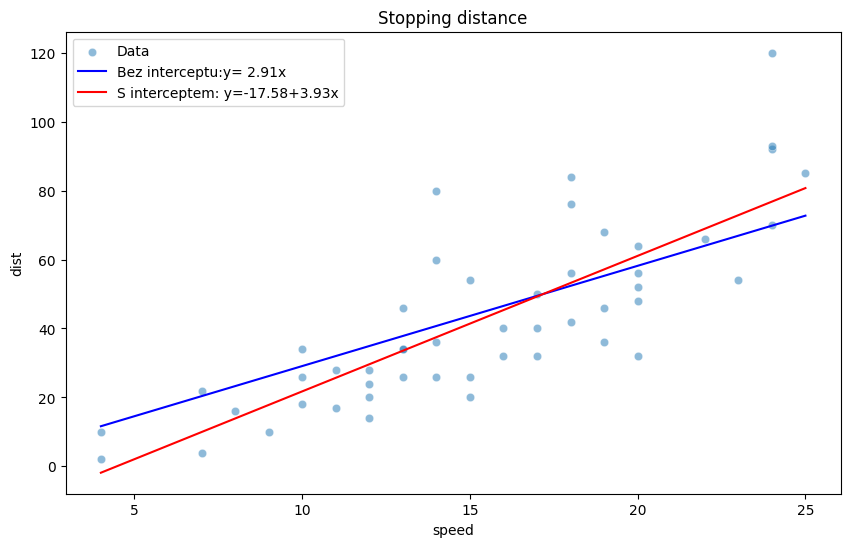

In [ ]:
#5) plot
beta_wo=model0.params[0] #bez interceptu
beta_w0, beta_w1=model1.params
plt.figure(figsize=(10,6))
sns.scatterplot(data=cars_df,x="speed",y="dist",label="Data",alpha=0.5)
plt.plot(cars_df["speed"],cars_df["speed"]*beta_wo,color='blue',
         label=f'Bez interceptu:y={beta_wo: .2f}x')
plt.plot(cars_df['speed'],beta_w0+cars_df['speed']*beta_w1,color='red',
         label=f'S interceptem: y={beta_w0:.2f}+{beta_w1:.2f}x')
plt.title("Stopping distance")
plt.legend()
plt.show()



6) lm function ??

In [ ]:
prediction_20_wo=model0.predict([20,30])
df_predict=pd.DataFrame({
    'const':1,
    'speed': [20,30]
})
prediction_20=model1.predict(df_predict)
[prediction_20_wo,prediction_20]

[array([58.18264288, 87.27396432]),
 0     61.069080
 1    100.393168
 dtype: float64]

8) next steps: Analýza reziduí, koeficienty determinace, normalita reziduí